# Stock Market Predictions with LSTM

## Introduction

The primary objective of this notebook is to predict stock prices using **Long Short-Term Memory (LSTM)** networks, a type of Recurrent Neural Network (RNN) designed to capture long-term dependencies in sequential data. LSTMs are well-suited for time-series forecasting, making them ideal for predicting future stock prices based on past trends.

### Dataset Features:
- **Date**: The date corresponding to the stock data.
- **Open**: The opening price of the stock.
- **High**: The highest price during the trading day.
- **Low**: The lowest price during the trading day.
- **Close**: The closing price of the stock.
- **Volume**: The total number of shares traded.
- **Dividends**: Dividend payments made on that date (if applicable).
- **Stock Splits**: Details of any stock splits occurring on that day.
- **Company**: The company ticker symbol.

### Use Cases:
- **Trend Analysis**: Investigate how stock prices of large companies move over time.
- **Volatility Assessment**: Analyze fluctuations in stock prices and market conditions.
- **Predictive Modeling**: Build a predictive model using LSTM to forecast future stock prices.

### Objective:
I aim to build and train an LSTM model to forecast stock prices, using historical data to predict future trends. This model will help demonstrate how machine learning can be applied to financial data to make informed predictions.

Before starting the analysis, I will perform necessary data cleaning, handle missing values, and ensure consistency across the dataset.


In [60]:
import warnings
warnings.filterwarnings('ignore')

In [61]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Download latest version
path = kagglehub.dataset_download("iveeaten3223times/massive-yahoo-finance-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/massive-yahoo-finance-dataset


## Exploratory Data Analysis (EDA)

In [62]:
data = pd.read_csv(path + "/stock_details_5_years.csv")
print(data.describe())

                Open           High            Low          Close  \
count  602962.000000  602962.000000  602962.000000  602962.000000   
mean      140.074711     141.853492     138.276316     140.095204   
std       275.401725     279.003191     271.895276     275.477969   
min         1.052425       1.061195       1.026114       1.034884   
25%        39.566159      40.056222      39.058151      39.563746   
50%        79.177964      80.125563      78.193820      79.177906   
75%       157.837190     159.746317     155.841609     157.847153   
max      6490.259766    6525.000000    6405.000000    6509.350098   

             Volume     Dividends   Stock Splits  
count  6.029620e+05  602962.00000  602962.000000  
mean   5.895601e+06       0.00731       0.000344  
std    1.381596e+07       0.12057       0.050607  
min    0.000000e+00       0.00000       0.000000  
25%    1.031500e+06       0.00000       0.000000  
50%    2.228700e+06       0.00000       0.000000  
75%    5.277400e+06  

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602962 entries, 0 to 602961
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          602962 non-null  object 
 1   Open          602962 non-null  float64
 2   High          602962 non-null  float64
 3   Low           602962 non-null  float64
 4   Close         602962 non-null  float64
 5   Volume        602962 non-null  int64  
 6   Dividends     602962 non-null  float64
 7   Stock Splits  602962 non-null  float64
 8   Company       602962 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 41.4+ MB


In [64]:
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
0,2018-11-29 00:00:00-05:00,43.829761,43.863354,42.639594,43.083508,167080000,0.00,0.0,AAPL
1,2018-11-29 00:00:00-05:00,104.769074,105.519257,103.534595,104.636131,28123200,0.00,0.0,MSFT
2,2018-11-29 00:00:00-05:00,54.176498,55.007500,54.099998,54.729000,31004000,0.00,0.0,GOOGL
3,2018-11-29 00:00:00-05:00,83.749496,84.499496,82.616501,83.678497,132264000,0.00,0.0,AMZN
4,2018-11-29 00:00:00-05:00,39.692784,40.064904,38.735195,39.037853,54917200,0.04,0.0,NVDA


## Data preprocessing

In [65]:
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

In [66]:
# Handling missing values
data.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Company         0
dtype: int64

# EDA for Amazon stock

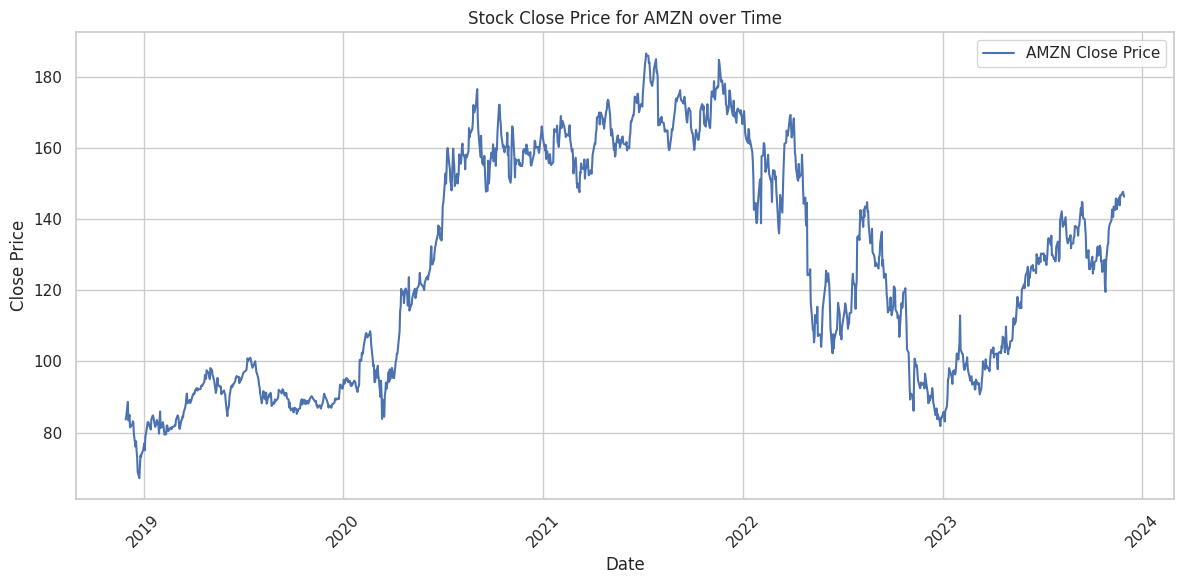

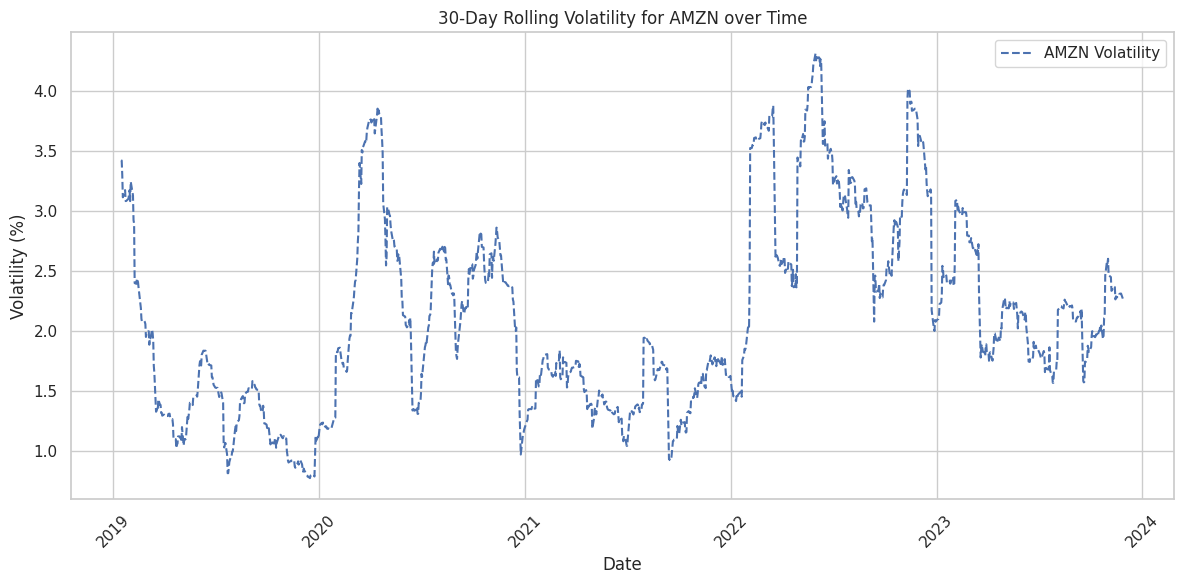

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the company to 'AMZN' for Amazon
company = 'AMZN'

# Create the first figure for Stock Prices (only for AMZN)
plt.figure(figsize=(12, 6))

# Filter the data for Amazon
company_df = data[data['Company'] == company]

# Plot Amazon stock prices
plt.plot(company_df['Date'], company_df['Close'], label=f'{company} Close Price')

# Title and labels for the first plot (Stock Prices)
plt.title('Stock Close Price for AMZN over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the first figure (Stock Price for AMZN)
plt.show()

# Create the second figure for Volatility Assessment (only for AMZN)
plt.figure(figsize=(12, 6))

# Calculate the daily percentage change for AMZN
company_df['Daily_Return'] = company_df['Close'].pct_change() * 100

# Calculate the rolling volatility (standard deviation of daily returns over 30 days)
company_df['Rolling_Volatility'] = company_df['Daily_Return'].rolling(window=30).std()

# Plot the rolling volatility for Amazon
plt.plot(company_df['Date'], company_df['Rolling_Volatility'], label=f'{company} Volatility', linestyle='--')

# Title and labels for the second plot (Volatility)
plt.title('30-Day Rolling Volatility for AMZN over Time')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


**Key Insights:**

Stock Close Price (AMZN):
- Significant volatility with notable peaks and troughs over the years.
- Initially stable, with a sharp rise until 2021, followed by a decline and subsequent stabilization.
- Recent data shows a rebound in stock price, indicating potential investor confidence.

30-Day Rolling Volatility (AMZN):
- Fluctuations in volatility are evident, with periods of both high and low volatility.
- Notable spikes in volatility occurred during specific market events or economic changes.
- Recent data suggests a decrease in volatility, which may indicate a more stable market environment for Amazon.

# Time-Series Forecasting with LSTM - Theoretic

## 1. Introduction to Time-Series Forecasting
Time-series forecasting is the process of predicting future values based on previously observed data. It is widely used in financial markets, weather prediction, and demand forecasting.

### Characteristics of Time-Series Data:
- **Temporal Dependency**: Observations are dependent on time.
- **Trends**: A long-term increase or decrease in the data.
- **Seasonality**: Regular patterns that repeat over time.
- **Noise**: Random fluctuations that do not follow a pattern.

## 2. Basics of LSTM (Long Short-Term Memory)
LSTMs are a special type of recurrent neural network (RNN) designed to learn long-term dependencies in sequential data. Unlike traditional RNNs, LSTMs solve the vanishing gradient problem by using memory cells and gates.

### LSTM Components:
- **Cell State**: The memory that carries information across time steps.
- **Forget Gate**: Decides what information to discard.
- **Input Gate**: Determines what new information should be stored.
- **Output Gate**: Controls the final output for the current time step.

## 3. Why Use LSTM for Time-Series Forecasting?
- LSTMs can **retain information over long sequences**.
- They capture **complex dependencies** between past and future events.
- Effective for handling **non-linear time-series data**.

## 4. Data Preprocessing for LSTM
Before training an LSTM model, data must be preprocessed:
1. **Normalization**: Scale data using MinMaxScaler to improve convergence.
2. **Time-Series Windowing**: Convert data into sequences with a fixed number of time steps.
3. **Train-Test Split**: Ensure sequential splitting to maintain temporal order.

## 5. Building an LSTM Model
### Model Architecture:
- **Input Layer**: Time-series sequences.
- **LSTM Layers**: Extract temporal features.
- **Dropout Layers**: Reduce overfitting.
- **Dense Layer**: Outputs the final prediction.

# Train a model to predict AMZN stocks close prices

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1496 - mae: 0.2940 - val_loss: 0.0027 - val_mae: 0.0423
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0107 - mae: 0.0795 - val_loss: 0.0025 - val_mae: 0.0415
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0076 - mae: 0.0665 - val_loss: 0.0026 - val_mae: 0.0428
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0071 - mae: 0.0636 - val_loss: 0.0022 - val_mae: 0.0381
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0068 - mae: 0.0590 - val_loss: 0.0028 - val_mae: 0.0443
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0065 - mae: 0.0605 - val_loss: 0.0028 - val_mae: 0.0448
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0070 - mae: 0.0618 - val_loss: 0.0025 - val_mae: 0.0419
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0067 - mae: 0.0614 - val_loss: 0.0025 - val_mae: 0.0414
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.005

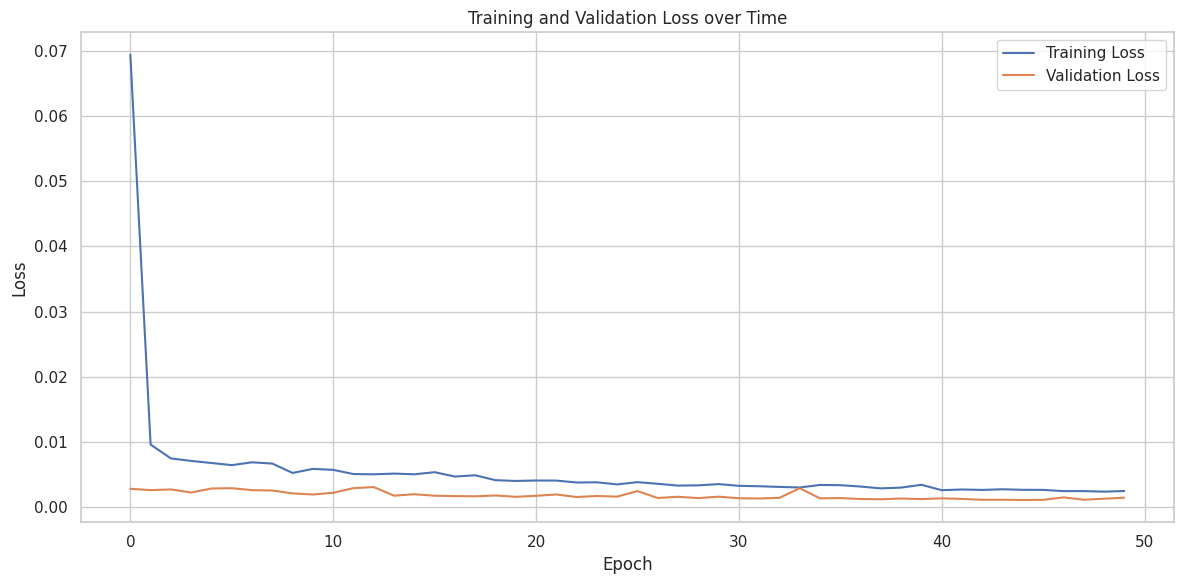

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Filter data for AMZN.
data_amzn = data[data['Company'] == 'AMZN'].copy()

# Select features (X) and target (y)
X = data_amzn.drop(['Company', 'Date', 'Close'], axis=1)
y = data_amzn['Close'].values.reshape(-1, 1)

# Normalize the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Define time window for sequences
time_steps = 60
def create_sequences(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

# Create sequences
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42, shuffle=False)

# Build a professional LSTM model
model = Sequential([
    LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(units=64, return_sequences=True),
    Dropout(0.2),
    LSTM(units=64),
    Dropout(0.2),
    Dense(units=32, activation='relu'),
    Dense(units=1)
])

# Compile the model with improved settings
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model with validation data
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Save the model
model.save('model.h5')

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Detailed Process for Each Time Step with an LSTM

## 1. Initialization:

At the initial time step \( t = 0 \), the model starts without any prior knowledge, so the initial hidden state \( h_0 \) and the cell state \( C_0 \) are initialized. These are typically set to zero or random values.

- The initial hidden state is \( h_0 = 0 \)
- The initial cell state is \( C_0 = 0 \)

---

## 2. Processing at Each Time Step:

At each time step \( t \), a new element \( x_t \) from the time series is fed into the LSTM. For example, in a stock price time series, \( x_t \) would represent the price at time \( t \).

At each step, the LSTM does the following:

- Updates the **cell state** \( C_t \), which functions as the "memory" of the model, deciding what information to "forget" or "remember."
- Updates the **hidden state** \( h_t \), which is the output at each step and is used for predictions or passed to the next time step.

---

## 3. Calculation at Each Time Step \( t \):

At each time step, the model follows these steps:

### a. Forget Gate:

The forget gate determines **what information** from the previous cell state \( C_{t-1} \) should be discarded or retained. It computes a value between 0 and 1 for each element in the previous cell state.

The forget gate is computed as:

$$
f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)
$$

where:
- \( f_t \) is the forget gate output,
- \( \sigma \) is the sigmoid activation function,
- \( W_f \) is the weight matrix for the forget gate,
- \( b_f \) is the bias for the forget gate,
- \( h_{t-1} \) is the previous hidden state,
- \( x_t \) is the input at time step \( t \).

### b. Input Gate:

The input gate decides **what new information** should be added to the cell state. It involves two components:
1. A candidate cell state \( \tilde{C}_t \), which proposes new information.
2. A gate that determines which parts of this candidate cell state will actually update the cell state.

The input gate and candidate cell state are computed as:

$$
i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i)
$$

$$
\tilde{C}_t = \tanh(W_C \cdot [h_{t-1}, x_t] + b_C)
$$

where:
- \( i_t \) is the input gate output,
- \( \tilde{C}_t \) is the candidate cell state,
- \( \tanh \) is the hyperbolic tangent activation function,
- \( W_i \), \( W_C \) are weight matrices,
- \( b_i \), \( b_C \) are biases.

### c. Output Gate:

The output gate decides the **hidden state** \( h_t \), which is the output at each time step. The hidden state is determined by both the output gate and the current cell state \( C_t \).

The output gate is computed as:

$$
o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o)
$$

The hidden state is computed as:

$$
h_t = o_t \cdot \tanh(C_t)
$$

where:
- \( o_t \) is the output gate output,


# Evaluate the model

Test Loss: 0.001369, Test MAE: 0.029491
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Mean Squared Error (MSE): 19.511676
Root Mean Squared Error (RMSE): 4.417202
Mean Absolute Error (MAE): 3.520473


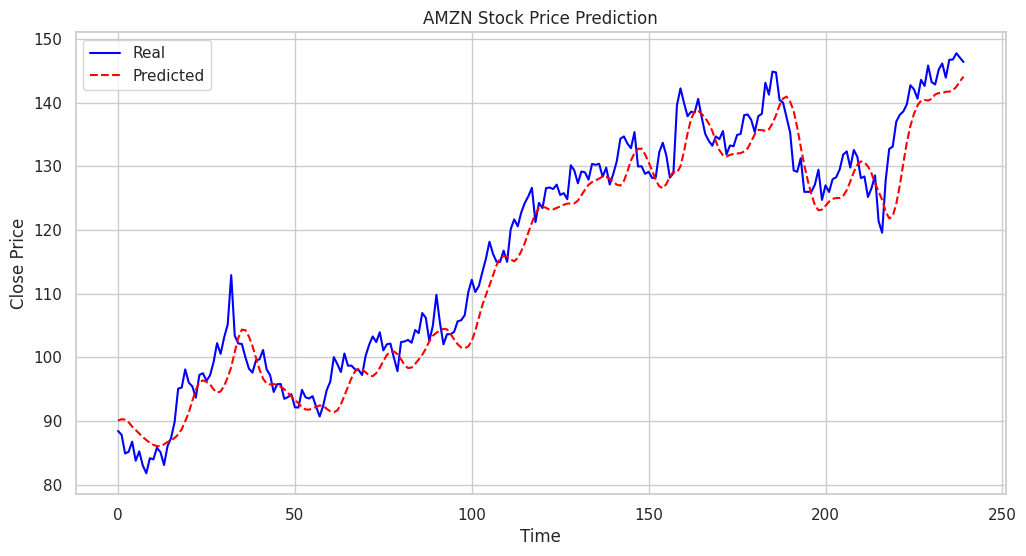

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Evaluate the model
eval_results = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {eval_results[0]:.6f}, Test MAE: {eval_results[1]:.6f}")

# Make predictions
y_pred = model.predict(X_test)

# Inverse scaling to get real stock prices
y_test_inv = scaler_y.inverse_transform(y_test)
y_pred_inv = scaler_y.inverse_transform(y_pred)

# Calculate performance metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, y_pred_inv)

print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")
print(f"Mean Absolute Error (MAE): {mae:.6f}")

# Plot real vs predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Real', color='blue')
plt.plot(y_pred_inv, label='Predicted', color='red', linestyle='dashed')
plt.title('AMZN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

The LSTM model demonstrates strong predictive capabilities for Amazon's stock prices, achieving low error metrics and closely matching the real stock price trends. Let's try to improve it.

## Model Improvement

### Features engineering

#### SMA (Simple Moving Average)

The **Simple Moving Average (SMA)** is a widely used indicator in technical analysis to smooth out price data over a specified period of time. It is calculated by averaging the asset's closing prices over a set number of periods. The SMA is often used to identify the overall direction of a trend.

The SMA is calculated using the following formula:

$$
\text{SMA} = \frac{1}{n} \sum_{i=1}^{n} \text{Close}_i
$$

where \( n \) is the number of periods (for example, 10, 50, or 200 periods).

### Interpretation:
- **Bullish Signal**: A price above the SMA indicates a potential bullish trend (buy signal).
- **Bearish Signal**: A price below the SMA indicates a potential bearish trend (sell signal).
- **Crossovers**: When a short-term SMA crosses above a longer-term SMA, it can indicate a bullish signal (Golden Cross). Conversely, when the short-term SMA crosses below the longer-term SMA, it can indicate a bearish signal (Death Cross).

---

#### EMA (Exponential Moving Average)

The **Exponential Moving Average (EMA)** is another type of moving average that gives more weight to recent prices, making it more responsive to new information. It is more sensitive to recent price movements compared to the SMA, which treats all prices in the window equally. The EMA is calculated using the following formula:

$$
\text{EMA}_t = \alpha \cdot \text{Price}_t + (1 - \alpha) \cdot \text{EMA}_{t-1}
$$

where $$  \alpha = \frac{2}{n+1} $$ is the smoothing factor, and \( n \) is the number of periods (e.g., 12, 26, etc.).

### Interpretation:
- **Bullish Signal**: When the price is above the EMA, it suggests a bullish trend, and when the EMA is rising, it indicates momentum in the upward direction.
- **Bearish Signal**: When the price is below the EMA, it suggests a bearish trend, and when the EMA is declining, it indicates momentum in the downward direction.
- **Crossovers**: When a short-term EMA crosses above a long-term EMA, it signals a bullish momentum (Golden Cross). When a short-term EMA crosses below a long-term EMA, it signals a bearish momentum (Death Cross).

---

#### MACD (Moving Average Convergence Divergence)

The **Moving Average Convergence Divergence (MACD)** is a momentum and trend indicator used in technical analysis to identify changes in the strength, direction, momentum, and duration of an asset's price trend.

The MACD is calculated by subtracting the **26-period Exponential Moving Average (EMA)** from the **12-period Exponential Moving Average (EMA)**:

$$
\text{MACD} = \text{EMA}(12) - \text{EMA}(26)
$$

A **signal line**, which is a 9-period EMA of the MACD, is plotted above the MACD to indicate buy and sell signals. The MACD histogram represents the difference between the MACD line and the signal line.

### Interpretation:
- **Bullish Signal**: When the MACD crosses above the signal line, it indicates a potential bullish momentum (buy signal).
- **Bearish Signal**: When the MACD crosses below the signal line, it indicates a potential bearish momentum (sell signal).
- **Divergence**: When the MACD diverges from the price chart (i.e., the price reaches a new high or low, but the MACD does not), this can signal a potential reversal.

---

#### RSI (Relative Strength Index)

The **Relative Strength Index (RSI)** is a momentum oscillator that measures the speed and change of price movements, providing information about market overbought or oversold conditions. It is primarily used to identify potential reversal points in an asset's price.

The RSI is calculated using the following formula:

$$
\text{RSI} = 100 - \frac{100}{1 + RS}
$$

where **RS** is the average gain over **X** periods divided by the average loss over **X** periods. Typically, **X** is set to 14 periods.

### Interpretation:
- **Overbought**: An RSI above 70 indicates that the asset may be overbought, suggesting a potential correction or downward reversal.
- **Oversold**: An RSI below 30 indicates that the asset may be oversold, suggesting a potential rebound or upward reversal.
- **Neutral**: RSI values between 30 and 70 are generally considered neutral, indicating no strong overbought or oversold conditions.

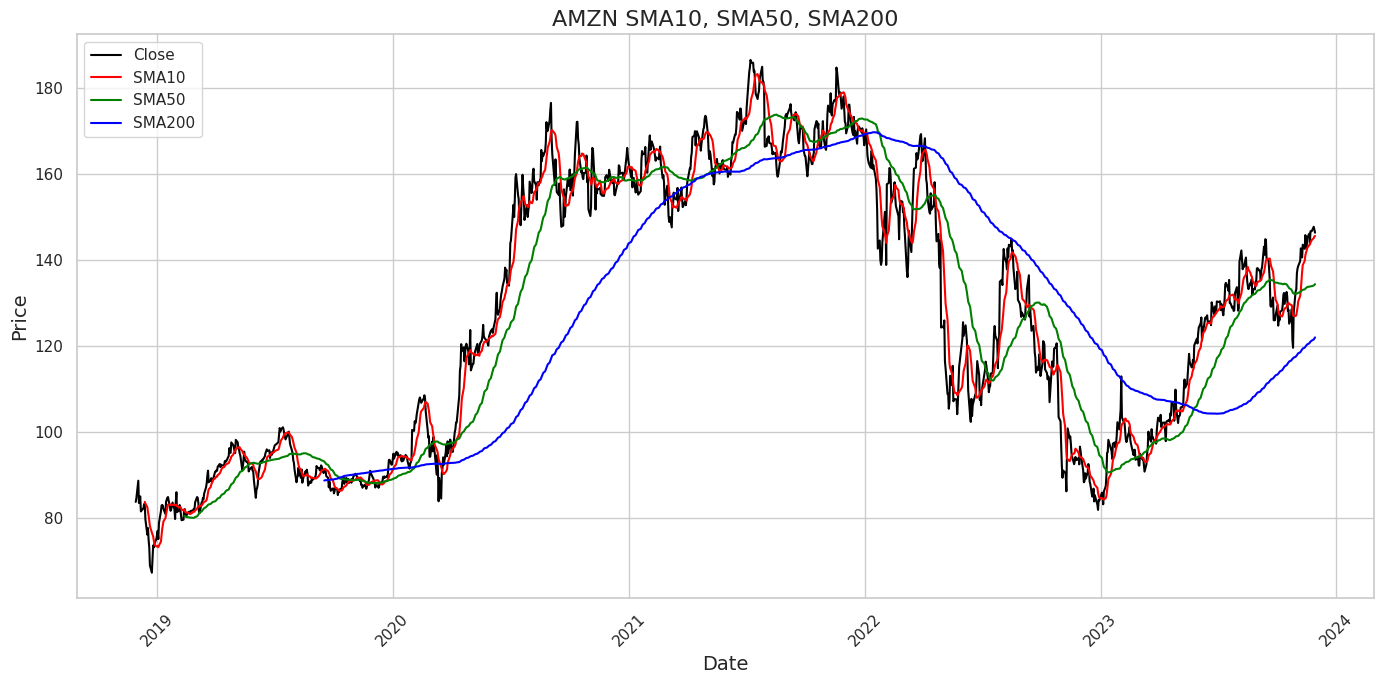

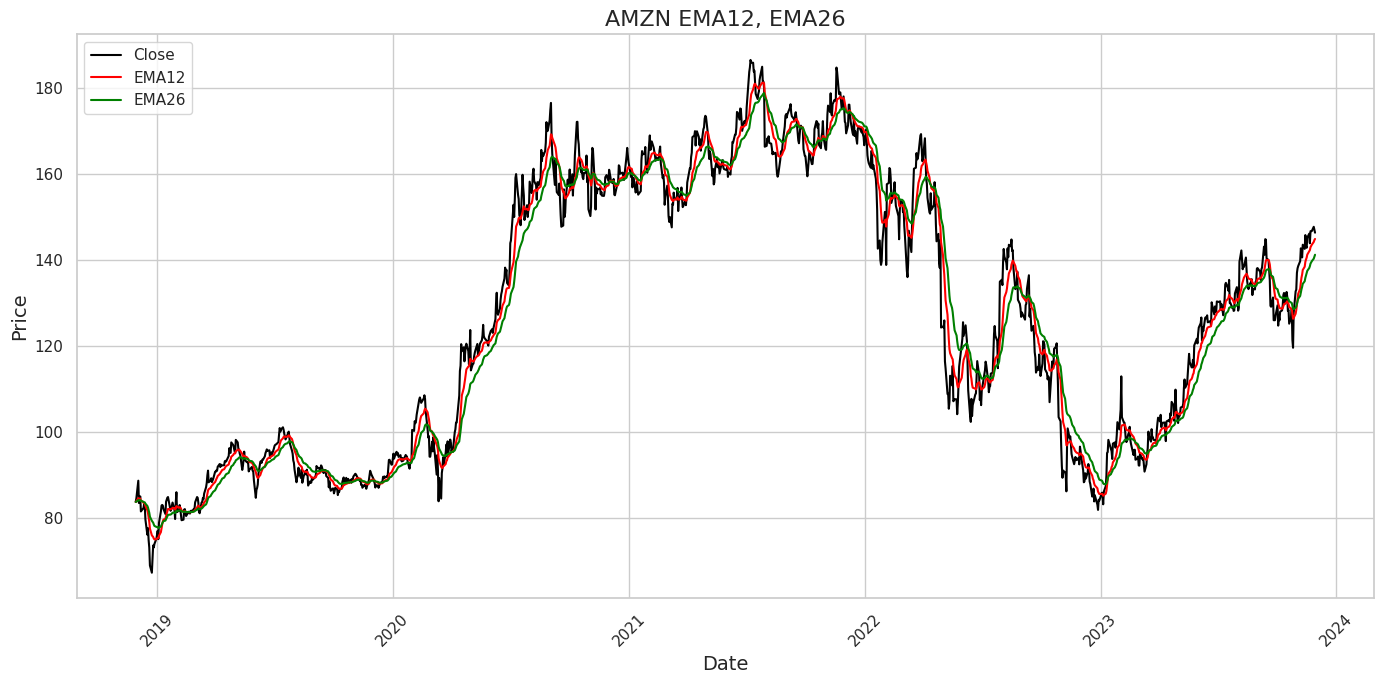

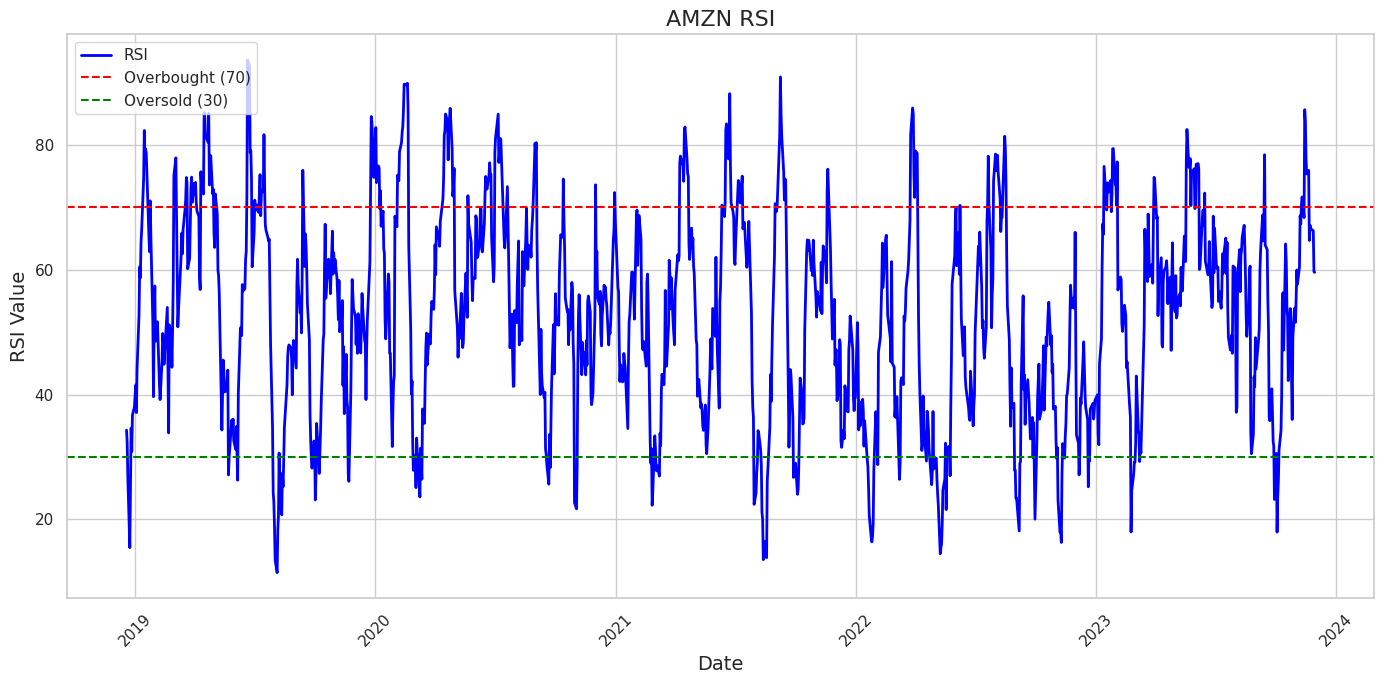

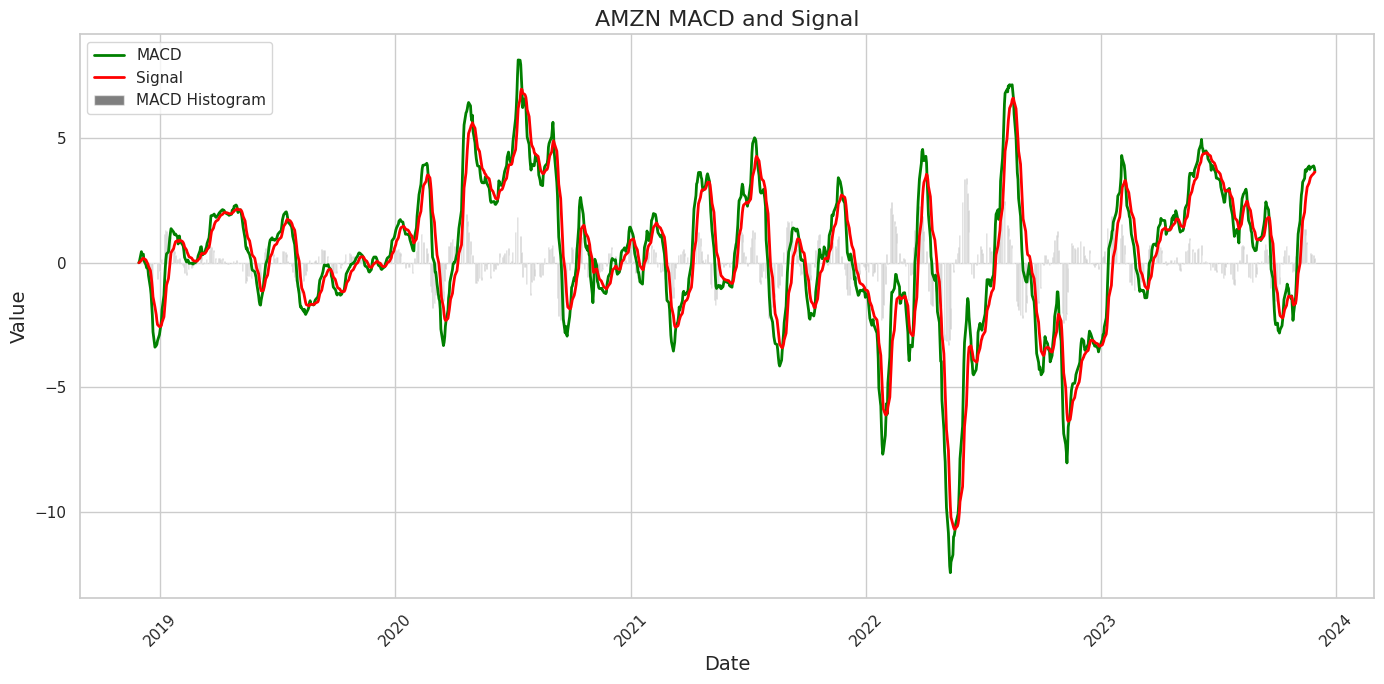

In [71]:
# Add features SMA10, SM50, SMA200, EMA12, EMA26, RSI, MACD to the data
data_amzn['SMA10'] = data_amzn['Close'].rolling(window=10).mean()
data_amzn['SMA50'] = data_amzn['Close'].rolling(window=50).mean()
data_amzn['SMA200'] = data_amzn['Close'].rolling(window=200).mean()
data_amzn['EMA12'] = data_amzn['Close'].ewm(span=12, adjust=False).mean()
data_amzn['EMA26'] = data_amzn['Close'].ewm(span=26, adjust=False).mean()

# Calculate the Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# Calculate the Moving Average Convergence Divergence (MACD)
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

# Calculate RSI and MACD
data_amzn['RSI'] = calculate_rsi(data_amzn)
macd, signal = calculate_macd(data_amzn)
data_amzn['MACD'] = macd
data_amzn['MACD_signal'] = data_amzn['MACD'].ewm(span=9, adjust=False).mean()
data_amzn['MACD_histogram'] = data_amzn['MACD'] - data_amzn['MACD_signal']

sns.set(style="whitegrid")


# Plot SMA10, SMA50, SMA200 using seaborn
plt.figure(figsize=(14, 7))
sns.lineplot(x=data_amzn['Date'], y=data_amzn['Close'], label='Close', color='black', linewidth=1.5)
sns.lineplot(x=data_amzn['Date'], y=data_amzn['SMA10'], label='SMA10', color='red', linewidth=1.5)
sns.lineplot(x=data_amzn['Date'], y=data_amzn['SMA50'], label='SMA50', color='green', linewidth=1.5)
sns.lineplot(x=data_amzn['Date'], y=data_amzn['SMA200'], label='SMA200', color='blue', linewidth=1.5)
plt.title('AMZN SMA10, SMA50, SMA200', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot EMA12 and EMA26 using seaborn
plt.figure(figsize=(14, 7))
sns.lineplot(x=data_amzn['Date'], y=data_amzn['Close'], label='Close', color='black', linewidth=1.5)
sns.lineplot(x=data_amzn['Date'], y=data_amzn['EMA12'], label='EMA12', color='red', linewidth=1.5)
sns.lineplot(x=data_amzn['Date'], y=data_amzn['EMA26'], label='EMA26', color='green', linewidth=1.5)
plt.title('AMZN EMA12, EMA26', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot RSI using seaborn
plt.figure(figsize=(14, 7))
sns.lineplot(x=data_amzn['Date'], y=data_amzn['RSI'], label='RSI', color='blue', linewidth=2)
plt.axhline(y=70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='green', linestyle='--', label='Oversold (30)')
plt.title('AMZN RSI', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('RSI Value', fontsize=14)
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot MACD and Signal using seaborn
plt.figure(figsize=(14, 7))
sns.lineplot(x=data_amzn['Date'], y=macd, label='MACD', color='green', linewidth=2)
sns.lineplot(x=data_amzn['Date'], y=signal, label='Signal', color='red', linewidth=2)
plt.bar(data_amzn['Date'], data_amzn['MACD_histogram'], label='MACD Histogram', color='black', alpha=0.5)
plt.title('AMZN MACD and Signal', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Now try to retrain our model with additional features

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0901 - mae: 0.2210 - val_loss: 0.0029 - val_mae: 0.0441
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0114 - mae: 0.0810 - val_loss: 0.0022 - val_mae: 0.0386
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0082 - mae: 0.0673 - val_loss: 0.0036 - val_mae: 0.0509
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0063 - mae: 0.0598 - val_loss: 0.0020 - val_mae: 0.0372
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0059 - mae: 0.0582 - val_loss: 0.0025 - val_mae: 0.0420
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0062 - mae: 0.0587 - val_loss: 0.0021 - val_mae: 0.0382
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0058 - mae: 0.0559 - val_loss: 0.0019 - val_mae: 0.0357
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0060 - mae: 0.0580 - val_loss: 0.0020 - val_mae: 0.0369
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.004

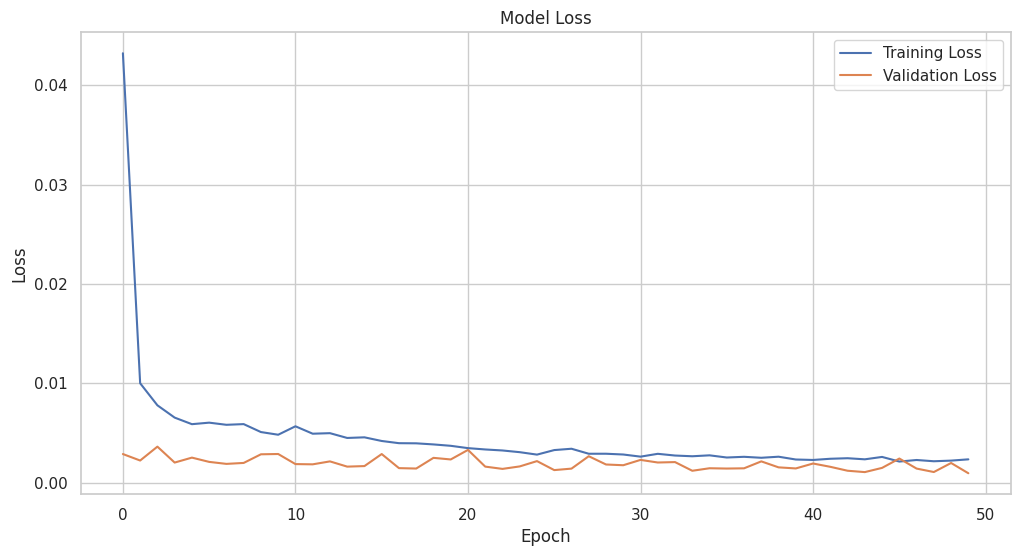

In [72]:
from tensorflow.keras.callbacks import TensorBoard
import datetime

# Configure TensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Retrain the model with TensorBoard
model_features = Sequential([
    LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(units=64, return_sequences=True),
    Dropout(0.2),
    LSTM(units=64),
    Dropout(0.2),
    Dense(units=32, activation='relu'),
    Dense(units=1)
])

model_features.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model with TensorBoard callback
history = model_features.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[tensorboard_callback],
    verbose=1
)

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Save the model with features
model_features.save('model_features.h5')

Test Loss: 0.001369, Test MAE: 0.029491
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Mean Squared Error (MSE): 13.483072
Root Mean Squared Error (RMSE): 3.671930
Mean Absolute Error (MAE): 2.879610


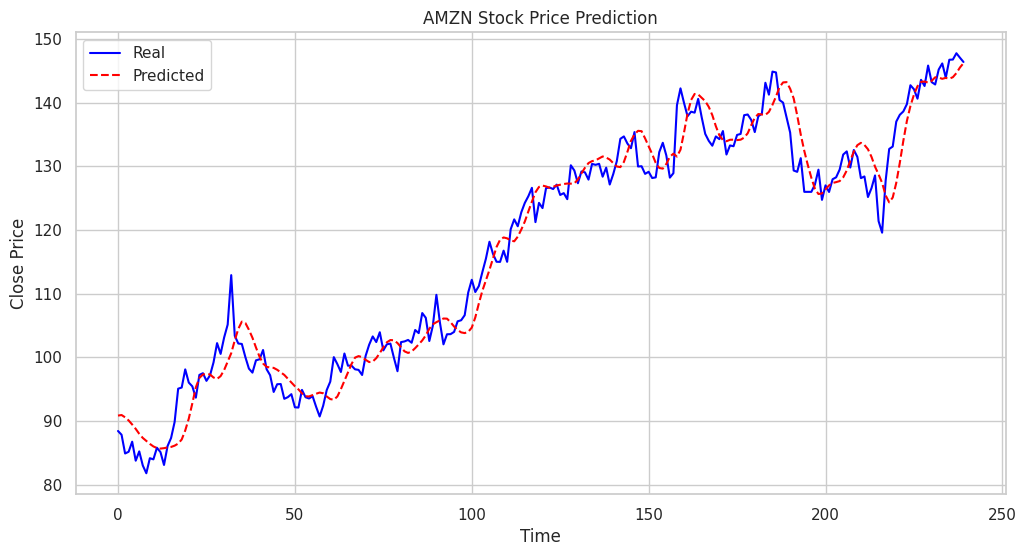

In [73]:
# Evaluate the model
eval_results = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {eval_results[0]:.6f}, Test MAE: {eval_results[1]:.6f}")

# Make predictions
y_pred_features = model_features.predict(X_test)

# Inverse scaling to get real stock prices
y_test_inv = scaler_y.inverse_transform(y_test)
y_pred_inv_features = scaler_y.inverse_transform(y_pred_features)

# Calculate performance metrics
mse = mean_squared_error(y_test_inv, y_pred_inv_features)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, y_pred_inv_features)

print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")
print(f"Mean Absolute Error (MAE): {mae:.6f}")

# Plot real vs predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Real', color='blue')
plt.plot(y_pred_inv_features, label='Predicted', color='red', linestyle='dashed')
plt.title('AMZN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

### Compare models

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
Model without features:
Mean Squared Error (MSE): 19.511676
Root Mean Squared Error (RMSE): 4.417202
Mean Absolute Error (MAE): 3.520473

Model with features:
Mean Squared Error (MSE): 13.483072
Root Mean Squared Error (RMSE): 3.671930
Mean Absolute Error (MAE): 2.879610



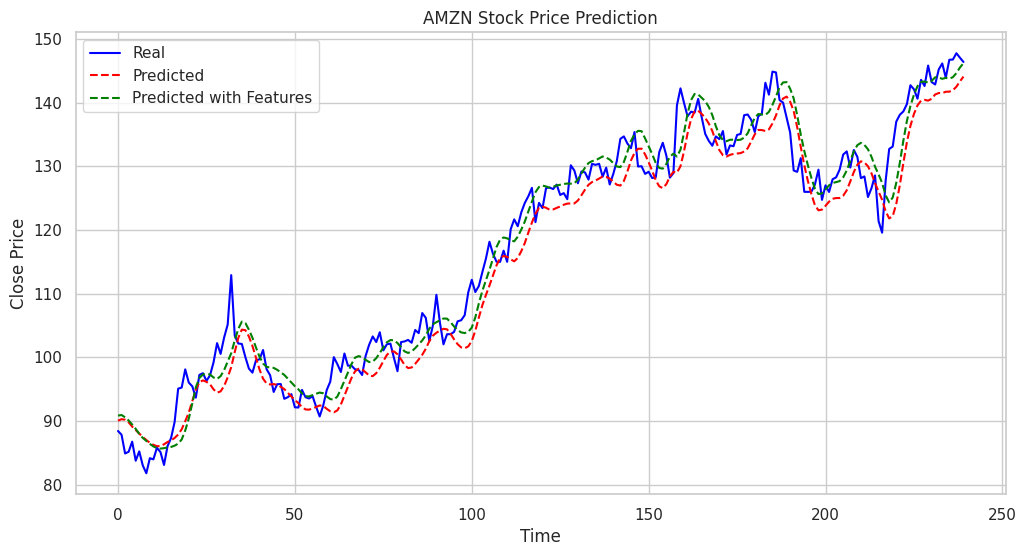

In [74]:
from tensorflow.keras.models import load_model

# Load the models
model = load_model('model.h5')
model_features = load_model('model_features.h5')

# Make predictions
y_pred = model.predict(X_test)
y_pred_features = model_features.predict(X_test)

# Inverse scaling to get real stock prices
y_test_inv = scaler_y.inverse_transform(y_test)
y_pred_inv = scaler_y.inverse_transform(y_pred)
y_pred_inv_features = scaler_y.inverse_transform(y_pred_features)

# Calculate performance metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mse_features = mean_squared_error(y_test_inv, y_pred_inv_features)
rmse_features = np.sqrt(mse_features)
mae_features = mean_absolute_error(y_test_inv, y_pred_inv_features)

print(f"Model without features:")
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")
print(f"Mean Absolute Error (MAE): {mae:.6f}")
print()
print(f"Model with features:")
print(f"Mean Squared Error (MSE): {mse_features:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse_features:.6f}")
print(f"Mean Absolute Error (MAE): {mae_features:.6f}")
print()

# Plot real vs predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Real', color='blue')
plt.plot(y_pred_inv, label='Predicted', color='red', linestyle='dashed')
plt.plot(y_pred_inv_features, label='Predicted with Features', color='green', linestyle='dashed')
plt.title('AMZN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()



Predictions that incorporate additional features are more closely aligned with the actual stock prices, suggesting that these features enhance prediction accuracy of the model.

### Model improvement with Keras tuner

Keras Tuner is a framework that automate the search for the best hyperparameters for my Keras models. The goal is to optimize parameters like the number of layers, learning rate, or batch size, as these have a significant impact on the model's performance.The tool explores different configurations using search algorithms like Random Search, Hyperband, or Bayesian Optimization. Here I will use Random Search.

Keras Tuner then evaluates the performance of each model, usually based on validation loss or other metrics, to determine the optimal combination.

In [75]:
from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# Define the model builder function with tunable hyperparameters
def build_model(hp):
    model = Sequential()
    
    # Add the first LSTM layer (always present)
    model.add(LSTM(
        units=hp.Int('units_0', min_value=64, max_value=256, step=64), 
        return_sequences=True, 
        input_shape=(X_train.shape[1], X_train.shape[2])
    ))
    model.add(Dropout(hp.Choice('dropout_0', values=[0.2, 0.3, 0.4])))
    
    # Add additional LSTM layers based on a tunable number of layers
    for i in range(hp.Int('num_layers', min_value=1, max_value=3)):
        model.add(LSTM(
            units=hp.Int(f'units_{i+1}', min_value=64, max_value=256, step=64), 
            return_sequences=(i < hp.Int('num_layers', min_value=1, max_value=3) - 1)
        ))
        model.add(Dropout(hp.Choice(f'dropout_{i+1}', values=[0.2, 0.3, 0.4])))
    
    # Add the final Dense layers
    model.add(Dense(units=hp.Int('dense_units', min_value=16, max_value=64, step=16), activation='relu'))
    model.add(Dense(units=1))
    
    # Compile the model
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']), 
        loss='mean_squared_error', 
        metrics=['mae']
    )
    return model

# Initialize the RandomSearch tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='tuner',
    project_name='stock_price_prediction'
)

# Search for the best hyperparameters
tuner.search(
    X_train, y_train, 
    epochs=50, 
    batch_size=32, 
    validation_data=(X_test, y_test), 
    verbose=1
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: {best_hps.values}")

Trial 10 Complete [00h 00m 25s]
val_loss: 0.0006911829113960266

Best val_loss So Far: 0.0006688693538308144
Total elapsed time: 00h 04m 39s
Best Hyperparameters: {'units_0': 256, 'dropout_0': 0.2, 'num_layers': 1, 'units_1': 128, 'dropout_1': 0.2, 'dense_units': 64, 'optimizer': 'adam', 'units_2': 64, 'dropout_2': 0.2, 'units_3': 256, 'dropout_3': 0.3}


Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0852 - mae: 0.2003 - val_loss: 0.0017 - val_mae: 0.0333
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0062 - mae: 0.0586 - val_loss: 0.0016 - val_mae: 0.0319
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0043 - mae: 0.0480 - val_loss: 0.0021 - val_mae: 0.0371
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0042 - mae: 0.0478 - val_loss: 0.0014 - val_mae: 0.0296
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0036 - mae: 0.0456 - val_loss: 0.0019 - val_mae: 0.0347
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0035 - mae: 0.0443 - val_loss: 0.0014 - val_mae: 0.0299
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0040 - mae: 0.0477 - val_loss: 0.0022 - val_mae: 0.0384
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0034 - mae: 0.0436 - val_loss: 0.0012 - val_mae: 0.0268
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.003

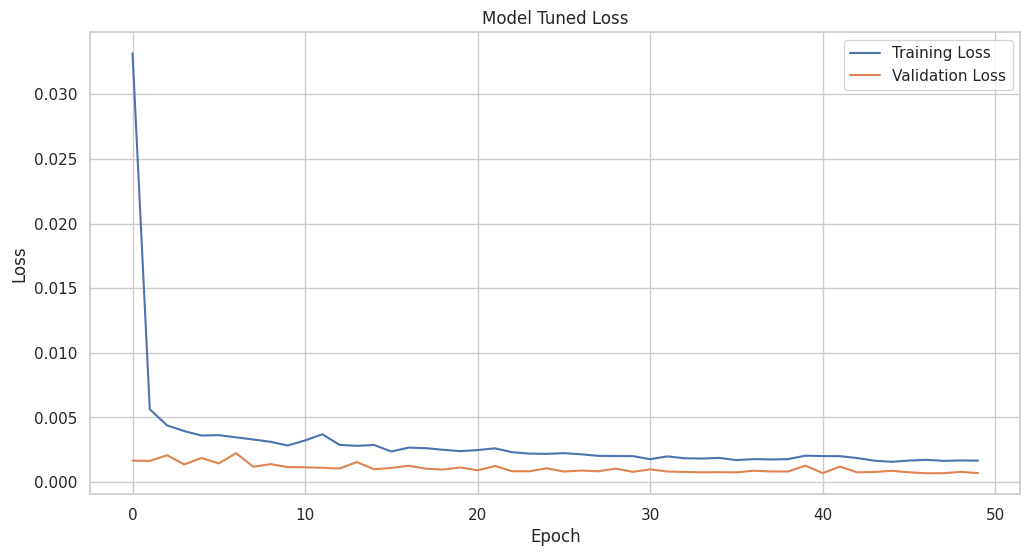

In [76]:
# Build the model with the best hyperparameters
model_tuned = tuner.hypermodel.build(best_hps)

# Train the model with the best hyperparameters
history = model_tuned.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Save the tuned model
model_tuned.save('model_tuned.h5')

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Tuned Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Test Loss: 0.000693, Test MAE: 0.020924
Mean Squared Error (MSE): 9.874881
Root Mean Squared Error (RMSE): 3.142432
Mean Absolute Error (MAE): 2.497797


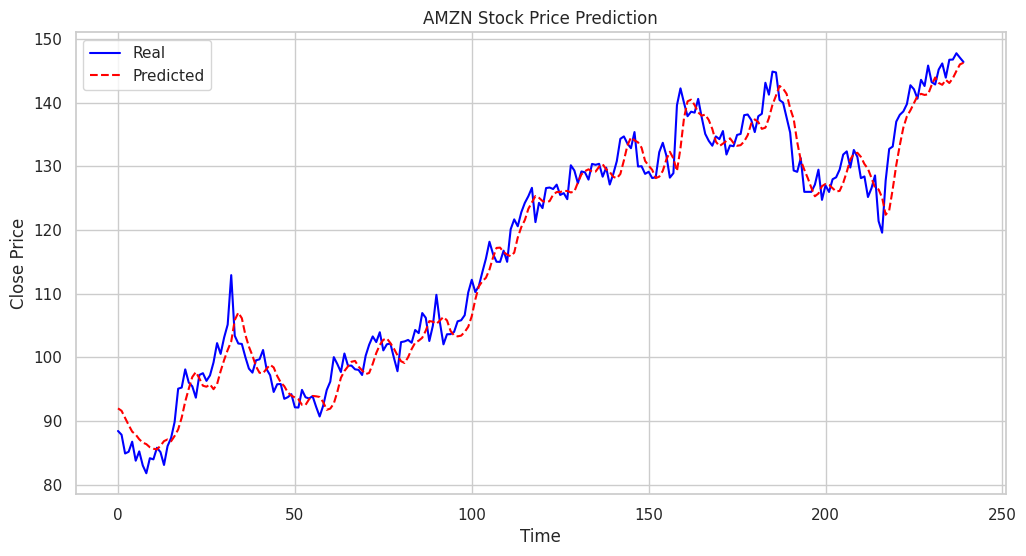

In [77]:
# Evaluate the tuned model
eval_results = model_tuned.evaluate(X_test, y_test, verbose=0)

# Make predictions
y_pred_tuned = model_tuned.predict(X_test)

# Inverse scaling to get real stock prices
y_pred_inv_tuned = scaler_y.inverse_transform(y_pred_tuned)

# Calculate performance metrics
mse_tuned = mean_squared_error(y_test_inv, y_pred_inv_tuned)
rmse_tuned = np.sqrt(mse_tuned)
mae_tuned = mean_absolute_error(y_test_inv, y_pred_inv_tuned)

print(f"Test Loss: {eval_results[0]:.6f}, Test MAE: {eval_results[1]:.6f}")
print(f"Mean Squared Error (MSE): {mse_tuned:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tuned:.6f}")
print(f"Mean Absolute Error (MAE): {mae_tuned:.6f}")

# Plot real vs predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Real', color='blue')
plt.plot(y_pred_inv_tuned, label='Predicted', color='red', linestyle='dashed')
plt.title('AMZN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

### Compare all models

Model without features:
Mean Squared Error (MSE): 19.511676
Root Mean Squared Error (RMSE): 4.417202
Mean Absolute Error (MAE): 3.520473

Model with features:
Mean Squared Error (MSE): 13.483072
Root Mean Squared Error (RMSE): 3.671930
Mean Absolute Error (MAE): 2.879610

Tuned Model:
Mean Squared Error (MSE): 9.874881
Root Mean Squared Error (RMSE): 3.142432
Mean Absolute Error (MAE): 2.497797


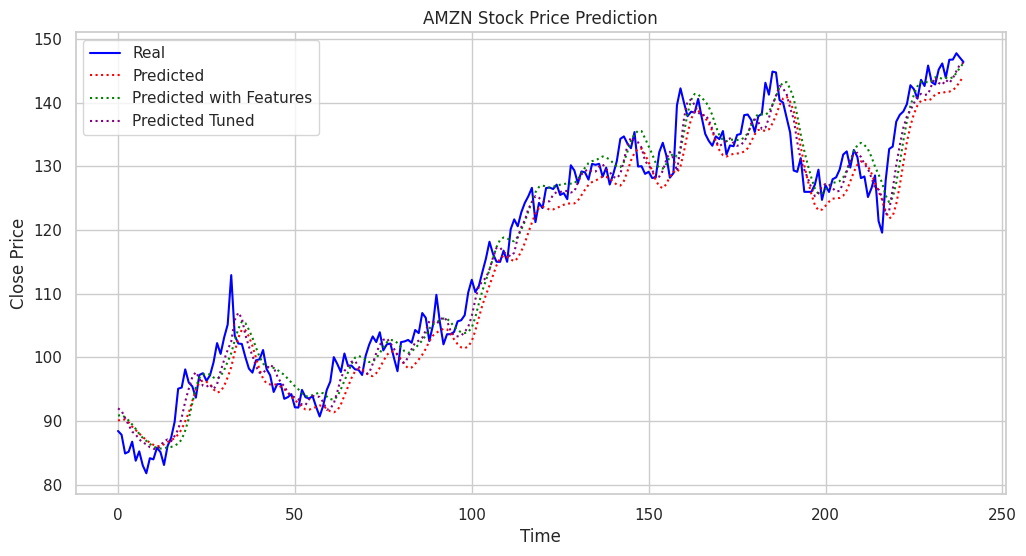

In [78]:
# Load the tuned model
model_tuned = load_model('model_tuned.h5')

# Print all the performance metrics
print(f"Model without features:")
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")
print(f"Mean Absolute Error (MAE): {mae:.6f}")
print()
print(f"Model with features:")
print(f"Mean Squared Error (MSE): {mse_features:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse_features:.6f}")
print(f"Mean Absolute Error (MAE): {mae_features:.6f}")
print()
print(f"Tuned Model:")
print(f"Mean Squared Error (MSE): {mse_tuned:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tuned:.6f}")
print(f"Mean Absolute Error (MAE): {mae_tuned:.6f}")

# Plot real vs predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Real', color='blue')
plt.plot(y_pred_inv, label='Predicted', color='red', linestyle='dotted')
plt.plot(y_pred_inv_features, label='Predicted with Features', color='green', linestyle='dotted')
plt.plot(y_pred_inv_tuned, label='Predicted Tuned', color='purple', linestyle='dotted')
plt.title('AMZN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()


The results of the models show a clear progression in performance. Starting from the baseline model, which struggles to make accurate predictions, the incorporation of features significantly improved the accuracy of the model, as evidenced by the reduction in error metrics. The final tuned model, after hyperparameter optimisation, showed the best performance with the lowest error values, further confirming the importance of feature engineering and model fine-tuning.

# Conclusion

The results show that LSTMs can offer promising forecasts for stock prices, although challenges remain, including the need to process noisy data and the complexity of financial markets.

Through this project, I have successfully gained a deeper understanding of key concepts :

**Financial Skills**

Market Understanding: Gained a deep understanding of stock market dynamics, including open/close prices, volume, and volatility, essential for data interpretation and informed decision-making.

Financial Data Analysis: Proficient in exploratory data analysis (EDA) to identify trends and anomalies, forming the basis for effective investment strategies.

Risk Assessment: Developed techniques to evaluate investment risks, considering stock volatility and market fluctuations.

**Machine Learning Skills**

LSTM Modeling:  Gained practical skills in building and training LSTM models, which are particularly well suited to time series. This allowed me to understand how neural networks can be applied to sequential data.


